

# Project: Investigate the TMDb movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The IMDb movie dataset is being analyzed herein. Analysis has been designed to answer following questions:

1. Which genre is the most common one among the top 250 rated movies?
2. Top 25 Production Companies With Higher Number Of Release among the top rated 250 movies?¶
3. Number of movies released year over year?

In [2]:
# Use this cell to set up import statements for all of the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head(1)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
# types and look for instances of missing or possibly errant data.
print(sum(df.isnull().any()))
print(df.info())

9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date     

In [4]:
# fill in NaN with 0
df.fillna(0,inplace = True)
print(df.isnull().any())


id                      False
imdb_id                 False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
homepage                False
director                False
tagline                 False
keywords                False
overview                False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool



### Data Cleaning

In [5]:
# drop columns not necessary to answer my questions

df.drop(columns = ["budget","original_title","homepage","tagline","runtime","keywords","overview","budget_adj","revenue_adj"],inplace =True)
df.head(1)

,id,imdb_id,popularity,revenue,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [6]:
# remove duplicate rows
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [7]:
# changing format of release date into datetime format 
df['release_date'] = pd.to_datetime(df['release_date'])


In [9]:
# create a new dataframe with no 0 revenues
df_new = df[df['revenue'] != 0]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    4849 non-null   int64         
 1   imdb_id               4849 non-null   object        
 2   popularity            4849 non-null   float64       
 3   revenue               4849 non-null   int64         
 4   cast                  4849 non-null   object        
 5   director              4849 non-null   object        
 6   genres                4849 non-null   object        
 7   production_companies  4849 non-null   object        
 8   release_date          4849 non-null   datetime64[ns]
 9   vote_count            4849 non-null   int64         
 10  vote_average          4849 non-null   float64       
 11  release_year          4849 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 492.5+ 

# <a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which genre is the most common among the top 250 rated movies?

In [15]:
#Explore the statistics of the dataset in general

df_new.describe()

,id,popularity,revenue,vote_count,vote_average,release_year
count,4849.000000,4849.000000,4.849000e+03,4849.000000,4849.000000,4849.000000
mean,44575.491648,1.045202,8.923886e+07,436.283151,6.149000,2000.919777
std,72368.860461,1.356752,1.620801e+08,806.485754,0.798707,11.569650
min,5.000000,0.001117,2.000000e+00,10.000000,2.100000,1960.000000
25%,8285.000000,0.387740,7.732325e+06,46.000000,5.600000,1994.000000
50%,12154.000000,0.680581,3.185308e+07,147.000000,6.200000,2004.000000
75%,43959.000000,1.210502,9.996575e+07,435.000000,6.700000,2010.000000
max,417859.000000,32.985763,2.781506e+09,9767.000000,8.400000,2015.000000


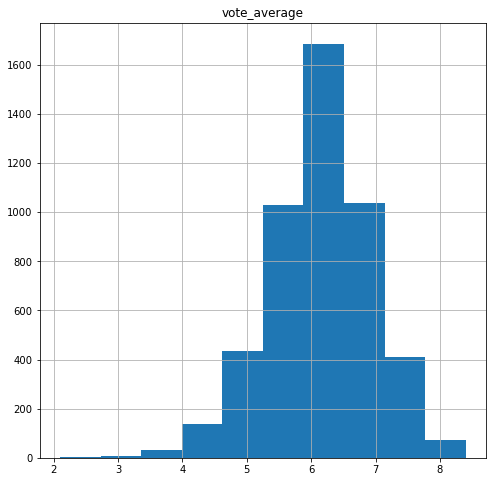

In [28]:
# 1d visuals

df_new.hist(column = 'vote_average', figsize = (8,8));

Vote average ranging from 2 to 8 and most movies are rated at 6.

In [23]:
# create a new dataframe filtered top 250 rated movies 
df1 = df_new.sort_values(by = 'vote_average',ascending = False).head(250)
df1.head(1)


,id,imdb_id,popularity,revenue,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
4178,278,tt0111161,7.192039,28341469,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,Drama|Crime,Castle Rock Entertainment,1994-09-10,5754,8.4,1994


In [33]:
# create a function that split the string and return the count of x

def count_genre(x):
    data = df1[x].astype(str)
    data_split =pd.Series(data.str.cat(sep ='|').split('|'))
    graph = data_split.value_counts(ascending = False)
    return graph

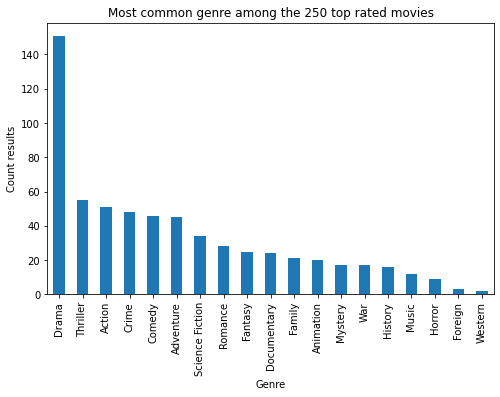

In [34]:
# call the function for counting the genres of the top rated 250 movies
genres = count_genre('genres')

#count unique genres and visualize count result in a bar chart
genres.plot(figsize = (8,5),kind = 'bar')
plt.title('Most common genre among the 250 top rated movies')
plt.xlabel('Genre')
plt.ylabel('Count results');

Conclusion 1: Drama is the most common genre among the top 250 rated movies.

### Research Question 2: Top 25 Production Companies With Higher Number Of Release?

In [35]:
#call the function for counting the production companies of the top rated 250 movies
production_companies = count_genre('production_companies')

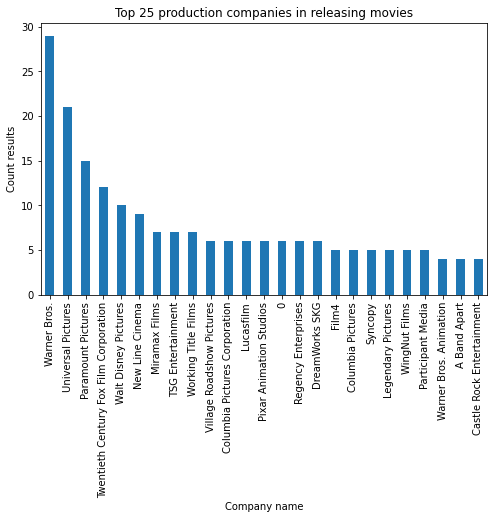

In [19]:
# Create a bar chart to present the result
production_companies.head(25).plot(figsize = (8,5),kind = 'bar')
plt.title('Top 25 production companies in releasing movies')
plt.xlabel('Company name')
plt.ylabel('Count results');

Conclusion 2: Warner Bros released the most movies among all ther companies.

### Research Question 3: Frequency of an actor/actress?

In [39]:
# call for the function to count the frequency of all actors for top 25 casts
cast_name = count_genre('cast')


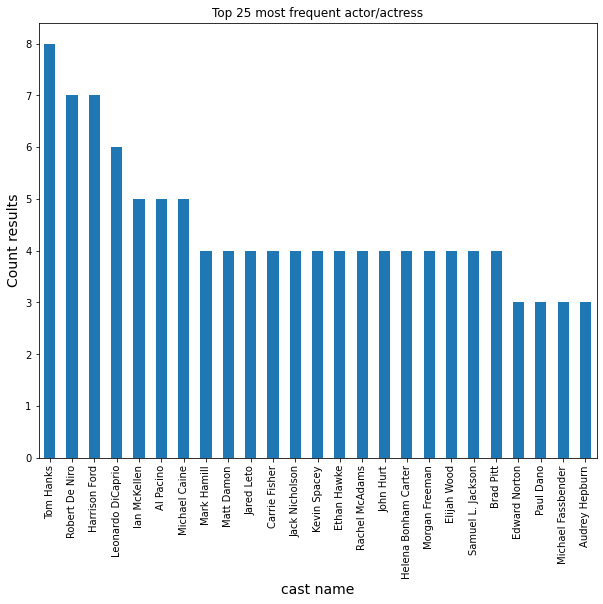

In [43]:
# plot the bar chart
cast_name.head(25).plot(figsize = (10,8),kind = 'bar');
plt.title('Top 25 most frequent actor/actress')
plt.xlabel('cast name',fontsize = 14)
plt.ylabel('Count results', fontsize = 14);

Conclusion 3: Tom Hanks appears to be the most frequently used actor among the top 25 actors/actresses.


<a id='conclusions'></a>
## Conclusions


Conclusion 1: Drama is the most common genre among the top 250 rated movies. 

Conclusion 2: Warner Bros released the most movies among all ther companies. 

Conclusion 3: Tom Hanks appears to be the most frequently used actor among the top 25 actors/actresses.

Limitations of the analysis:

1. In order to split strings by "|" in data, the function I used consumes time.
2. The analysis doesn't show the cause-effect relationship between the variables.